In [74]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

Hypotehsis: Steve Nash contribute to winning largely due to his number of assists, his points scored and minutes played. Now even though you have wins and losses there is points differential ie how much his team vs the other team scores

In [75]:
def WL(x):
    if x.__contains__('W'):
        return 1
    else:
        return 0

In [84]:
data = pd.read_csv("nash_05.csv", index_col=False)
data.drop(['Unnamed: 18'],axis=1, inplace=True)
data['WL']=data['WL'].map(lambda x: WL(x))
pts_ = data['Score'].copy()
for i in range(pts_.size):
    if pts_[i].__contains__("OT"):
        pts_[i]=pts_[i].replace("OT", '')
    pts_[i] = pts_[i].split("-")
    pts_[i] = int(pts_[i][0])-int(pts_[i][1])

pts = pd.Series(pts_)
data['pts_dif'] = pts
data

/tmp/ipykernel_86571/3992801636.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  data = pd.read_csv("nash_05.csv", index_col=False)


,Gm,Date,Opponent,WL,Score,Min,Pts,ORb,DRb,Reb,Ast,Stl,Blk,TO,PF,FGM/A,3PM/A,FTM/A,pts_dif
0,1,Nov. 03,vs. Hawks,1,112 - 82,24,12,0,3,3,4,2,0,3,2,6,-,12,30
1,2,Nov. 05,@ 76ers,1,108 - 98,32,9,0,4,4,10,0,0,4,5,3,-,5,10
2,3,Nov. 06,@ Nets,1,112 - 80,37,17,1,1,2,8,3,0,6,0,6,-,8,32
3,4,Nov. 09,@ Bulls,1,94 - 74,33,8,0,3,3,12,0,0,1,3,3,-,9,20
4,5,Nov. 10,@ Cavaliers,0,109 - 114OT,50,15,1,6,7,17,0,0,1,5,5,-,13,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,May. 22,vs. Spurs,0,114 - 121,41,29,0,4,4,13,1,1,6,5,12,-,22,-7
86,87,May. 24,vs. Spurs,0,108 - 111,46,29,0,5,5,15,1,0,5,2,13,-,22,-3
87,88,May. 28,@ Spurs,0,92 - 102,40,20,0,2,2,3,1,0,6,2,8,-,18,-10
88,89,May. 30,@ Spurs,1,111 - 106,41,17,0,4,4,12,2,0,2,2,6,-,10,5


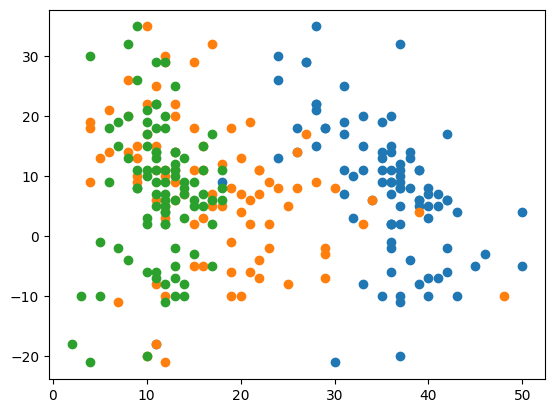

In [96]:
features=['Min', 'Pts', 'Ast']
for f in features:
    plt.plot(data[f], data['pts_dif'], 'o')
    

[Text(0.42378048780487804, 0.9545454545454546, 'Ast <= 5.5\ngini = 0.358\nsamples = 90\nvalue = [21, 69]'),
 Text(0.14634146341463414, 0.8636363636363636, 'Min <= 27.0\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.2850609756097561, 0.9090909090909092, 'True  '),
 Text(0.0975609756097561, 0.7727272727272727, 'Min <= 15.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.04878048780487805, 0.6818181818181818, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.14634146341463414, 0.6818181818181818, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.1951219512195122, 0.7727272727272727, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.7012195121951219, 0.8636363636363636, 'Min <= 44.0\ngini = 0.311\nsamples = 83\nvalue = [16, 67]'),
 Text(0.5625, 0.9090909090909092, '  False'),
 Text(0.5, 0.7727272727272727, 'Pts <= 18.5\ngini = 0.275\nsamples = 79\nvalue = [13, 66]'),
 Text(0.24390243902439024, 0.6818181818181818, 'Pts <= 12.5\ngini = 0.15\nsamples = 49\nvalue = [4.0, 45.

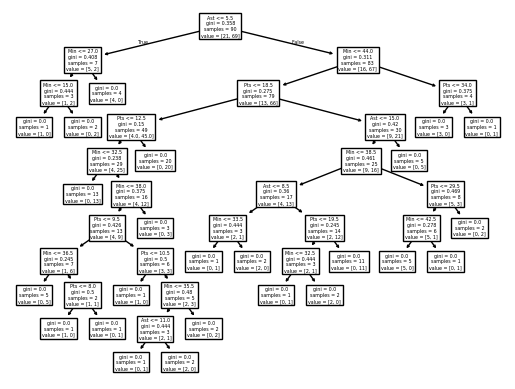

In [55]:

X = data[features]
y = data['WL']
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names=features)